<a href="https://colab.research.google.com/github/yunjeongcho/colab/blob/main/chr22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

read_file = pd.read_csv (r'/content/drive/MyDrive/project/gnomAD_chr22.txt')
read_file.to_csv (r'/content/drive/MyDrive/project/gnomAD_chr22.csv', index=None)

read_file = pd.read_csv (r'/content/drive/MyDrive/project/variants1722_cmm_chr22_pre2.txt')
read_file.to_csv (r'/content/drive/MyDrive/project/KGD_chr22.csv', index=None)



In [ ]:
gnomAD_chr22 = pd.read_csv('/content/drive/MyDrive/project/gnomAD_chr22.csv', delimiter = '\t')
KGD_chr22 = pd.read_csv('/content/drive/MyDrive/project/KGD_chr22.csv', delimiter = '\t')

In [ ]:
g22_ref = gnomAD_chr22.groupby("%REF")["%REF"].count()
k22_ref = KGD_chr22.groupby("reference")["reference"].count()

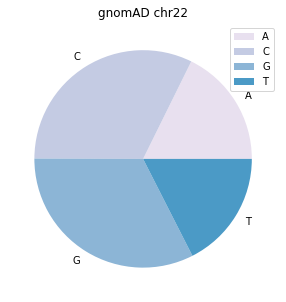

In [ ]:
fig=plt.figure(figsize=(5,5))
colors = sns.color_palette('PuBuGn')

plt.pie(g22_ref, labels = g22_ref.index, colors=colors)
plt.title("gnomAD chr22")
plt.legend()
plt.show()

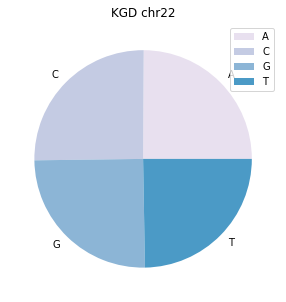

In [ ]:
fig=plt.figure(figsize=(5,5))
colors = sns.color_palette('PuBuGn')

plt.pie(k22_ref, labels = k22_ref.index, colors=colors)
plt.title("KGD chr22")
plt.legend()
plt.show()

In [ ]:
df= pd.concat([gnomAD_chr22,KGD_chr22], axis =1)
df1 = df.reset_index(drop=True)
df1

,%CHROM,%POS,%ID,%REF,%ALT,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,22,16050036,rs374742143,A,C,chr22,16050036.0,rs374742143,2.0,A,0.159836,C
1,22,16050068,.,A,G,chr22,16050159.0,rs375383604,2.0,C,0.638031,T
2,22,16050069,.,C,T,chr22,16050252.0,rs199856444,2.0,A,0.631610,T
3,22,16050098,.,G,A,chr22,16050408.0,rs149201999,2.0,T,0.981765,C
4,22,16050115,rs587755077,G,A,chr22,16050612.0,rs2186463,2.0,C,0.797030,G
...,...,...,...,...,...,...,...,...,...,...,...,...
3077215,22,51244443,rs62240673,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077216,22,51244487,.,C,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077217,22,51244509,.,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077218,22,51244515,rs202006767,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/KGD_chr22.csv', delimiter = '\t')
df2 = df.astype({'pos':'int64'})

df2["{altreq}"] = df2["{altreq}"].str.replace(" ", "")
df2

,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,chr22,16050036,rs374742143,2,A,0.159836,C
1,chr22,16050159,rs375383604,2,C,0.638031,T
2,chr22,16050252,rs199856444,2,A,0.631610,T
3,chr22,16050408,rs149201999,2,T,0.981765,C
4,chr22,16050612,rs2186463,2,C,0.797030,G
...,...,...,...,...,...,...,...
286822,chr22,51244342,-,2,T,0.969538,A
286823,chr22,51244368,-,2,T,0.987179,A
286824,chr22,51244398,-,2,C,0.985016,G
286825,chr22,51244435,-,2,C,0.987718,G


In [ ]:
chr22 = pd.merge(gnomAD_chr22,KGD_chr22,left_on="%POS",right_on="pos")

chr22["{altreq}"] = chr22["{altreq}"].str.replace(" ", "")
chr22

,%CHROM,%POS,%ID,%REF,%ALT,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,22,16050036,rs374742143,A,C,chr22,16050036,rs374742143,2,A,0.159836,C
1,22,16050159,rs375383604,C,T,chr22,16050159,rs375383604,2,C,0.638031,T
2,22,16050252,rs199856444,A,T,chr22,16050252,rs199856444,2,A,0.631610,T
3,22,16050408,rs149201999,T,C,chr22,16050408,rs149201999,2,T,0.981765,C
4,22,16050612,rs2186463,C,G,chr22,16050612,rs2186463,2,C,0.797030,G
...,...,...,...,...,...,...,...,...,...,...,...,...
247065,22,51244319,.,C,A,chr22,51244319,-,2,C,0.872102,A
247066,22,51244332,rs200908937,A,C,chr22,51244332,rs200908937,2,A,0.865687,C
247067,22,51244398,.,C,G,chr22,51244398,-,2,C,0.985016,G
247068,22,51244435,.,C,G,chr22,51244435,-,2,C,0.987718,G


In [ ]:
chr22_dict1 = dict(zip(chr22['%POS'], chr22['%ALT']))
chr22_dict2 = dict(zip(chr22['pos'], chr22['{altreq}']))
chr22_dict3 = dict(zip(chr22['%POS'], chr22['%REF']))

In [ ]:
import pandas as pd
col_names = ['position22','ref', 'g22', 'k22']
list_data = []
for key in chr22_dict1:
    if key in chr22_dict2:
        first, second = chr22_dict1[key], chr22_dict2[key]
        if first != second:
            third = second
            if key in chr22_dict3:
              a = chr22_dict3[key]
              result = [key,a,first,third]
              
            for i in ([result]):
              list_data.append(i)
print(list_data)

[[16050822, 'G', 'C', 'A'], [16051347, 'G', 'C', 'T'], [16051453, 'A', 'G', 'C'], [16051968, 'C', 'T', 'A'], [16052513, 'G', 'C', 'A'], [16052986, 'C', 'G', 'A'], [16053659, 'A', 'C', 'T'], [16054667, 'C', 'G', 'T'], [16054740, 'A', 'G', 'T'], [16055070, 'G', 'T', 'A'], [16055942, 'C', 'T', 'A'], [16056855, 'G', 'T', 'C'], [16058070, 'A', 'G', 'T'], [16058415, 'A', 'G', 'T'], [16058852, 'A', 'T', 'G'], [16059081, 'A', 'G', 'T'], [16059753, 'A', 'T', 'G'], [16060797, 'A', 'C', 'T'], [16061188, 'C', 'T', 'G'], [16061250, 'T', 'C', 'G'], [16061992, 'A', 'C', 'G'], [16066039, 'T', 'A', 'G'], [16066332, 'G', 'T', 'A'], [16066812, 'T', 'C', 'A'], [16067208, 'C', 'G', 'T'], [16067500, 'T', 'C', 'G'], [16067555, 'A', 'G', 'C'], [16069141, 'C', 'G', 'T'], [16069707, 'C', 'T', 'A'], [16070517, 'T', 'G', 'A'], [16071145, 'C', 'T', 'G'], [16072192, 'C', 'T', 'A'], [16073809, 'C', 'T', 'A'], [16073941, 'G', 'T', 'A'], [16074105, 'G', 'T', 'A'], [16077310, 'T', 'A', 'C'], [16078974, 'T', 'A', 'G'], 

In [ ]:
df22= pd.DataFrame(list_data, columns = col_names)
print(df22)  

       position22 ref g22 k22
0        16050822   G   C   A
1        16051347   G   C   T
2        16051453   A   G   C
3        16051968   C   T   A
4        16052513   G   C   A
...           ...  ..  ..  ..
37021    51239413   A   T   G
37022    51241298   T   G   A
37023    51241942   G   C   A
37024    51242613   A   T   C
37025    51243045   A   G   T

[37026 rows x 4 columns]


In [ ]:
gAT = df22.query('ref == "A" and g22 == "T"')
len_gAT=len(gAT)
len(gAT)

1980

In [ ]:
gAC=df22.query('ref == "A" and g22 == "C"')
len_gAC=len(gAC)
len(gAC)

1198

In [ ]:
gAG =  df22.query('ref == "A" and g22 == "G"')
len_gAG=len(gAG)
len(gAG)

5959

In [ ]:
gTA=df22.query('ref == "T" and g22 == "A"')
len_gTA=len(gTA)
len(gTA)

1194

In [ ]:
gTC=df22.query('ref == "T" and g22 == "C"')
len_gTC=len(gTC)
len(gTC)

5971

In [ ]:
gTG=df22.query('ref == "T" and g22 == "G"')
len_gTG=len(gTG)
len(gTG)

2023

In [ ]:
gCA=df22.query('ref == "C" and g22 == "A"')
len_gCA=len(gCA)
len(gCA)

1154

In [ ]:
gCT=df22.query('ref == "C" and g22 == "T"')
len_gCT=len(gCT)
len(gCT)

6187

In [ ]:
gCG=df22.query('ref == "C" and g22 == "G"')
len_gCG=len(gCG)
len(gCG)

1735

In [ ]:
gGA=df22.query('ref == "G" and g22 == "A"')
len_gGA=len(gGA)
len(gGA)

4333

In [ ]:
gGT=df22.query('ref == "G" and g22 == "T"')
len_gGT=len(gGT)
len(gGT)

2842

In [ ]:
gGC=df22.query('ref == "G" and g22 == "C"')
len_gGC=len(gGC)
len(gGC)

2450

In [ ]:
kAT=df22.query('ref == "A" and k22 == "T"')
len_kAT=len(kAT)
len(kAT)

5163

In [ ]:
kAC=df22.query('ref == "A" and k22 == "C"')
len_kAC=len(kAC)
len(kAC)

2346

In [ ]:
kAG=df22.query('ref == "A" and k22 == "G"')
len_kAG=len(kAG)
len(kAG)

1628

In [ ]:
kTA=df22.query('ref == "T" and k22 == "A"')
len_kTA=len(kTA)
len(kTA)

3631

In [ ]:
kTC=df22.query('ref == "T" and k22 == "C"')
len_kTC=len(kTC)
len(kTC)

1672

In [ ]:
kTG=df22.query('ref == "T" and k22 == "G"')
len_kTG=len(kTG)
len(kTG)

3885

In [ ]:
kCA=df22.query('ref == "C" and k22 == "A"')
len_kCA=len(kCA)
len(kCA)

2769

In [ ]:
kCT=df22.query('ref == "C" and k22 == "T"')
len_kCT=len(kCT)
len(kCT)

1755

In [ ]:
kCG=df22.query('ref == "C" and k22 == "G"')
len_kCG=len(kCG)
len(kCG)

4552

In [ ]:
kGA=df22.query('ref == "G" and k22 == "A"') 
len_kGA=len(kGA)
len(kGA)

3056

In [ ]:
kGT=df22.query('ref == "G" and k22 == "T"')
len_kGT=len(kGT)
len(kGT)

3002

In [ ]:
kGC=df22.query('ref == "G" and k22 == "C"')
len_kGC=len(kGC)
len(kGC)

3567

In [ ]:
import pandas as pd
plt_data = pd.DataFrame({'AT':[len_gAT,len_kAT],'AC':[len_gAC, len_kAC],'AG':[len_gAG,len_kAG],'TA':[len_gTA,len_kTA],'TC':[len_gTC,len_kTC],'TG':[len_gTG, len_kTG],'CA':[len_gCA,len_kCA],'CT':[len_gCT,len_kCT],'CG':[len_gCG,len_kCG],'GA':[len_gGA,len_kGA],'GT':[len_gGT,len_kGT],'GC':[len_gGC,len_kGC]})
plt_data

,AT,AC,AG,TA,TC,TG,CA,CT,CG,GA,GT,GC
0,1980,1198,5959,1194,5971,2023,1154,6187,1735,4333,2842,2450
1,5163,2346,1628,3631,1672,3885,2769,1755,4552,3056,3002,3567


In [ ]:
import pandas as pd

gnomAD = [1980,1198,5959,1194,5971,2023,1154,6187,1735,4333,2842,2450]
KGD = [5163,2346,1628,3631,1672,3885,2769,1755,4552,3056,3002,3567]

alt=['AT','AC','AG','TA','TC','TG','CA','CT','CG','GA','GT','GC']

df = pd.DataFrame({'gnomAD' : gnomAD, 'KGD' : KGD}, index = alt)
df

,gnomAD,KGD
AT,1980,5163
AC,1198,2346
AG,5959,1628
TA,1194,3631
TC,5971,1672
TG,2023,3885
CA,1154,2769
CT,6187,1755
CG,1735,4552
GA,4333,3056


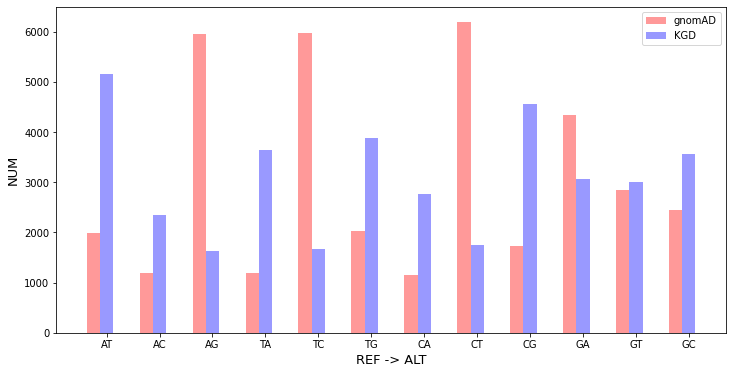

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(12)

b1 = plt.bar(index, df['gnomAD'], bar_width, alpha=0.4, color='red', label='gnomAD')

b2 = plt.bar(index + bar_width, df['KGD'], bar_width, alpha=0.4, color='blue', label='KGD')

plt.xticks(np.arange(bar_width, 12 + bar_width, 1), alt)

plt.xlabel('REF -> ALT', size = 13)
plt.ylabel('NUM', size = 13)
plt.legend()
plt.show()

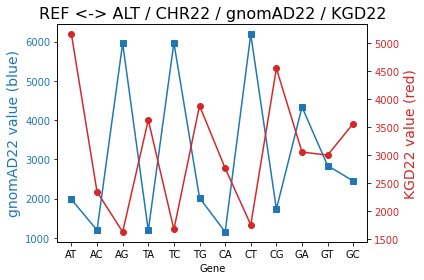

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('REF <-> ALT / CHR22 / gnomAD22 / KGD22', fontsize=16)
ax1.set_xlabel('Gene')
ax1.set_ylabel('gnomAD22 value (blue)', fontsize=14, color=color_1)

x=plt_data.columns
y=plt_data.loc[0]

ax1.plot(x,y, marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)


ax2 = ax1.twinx()
color_2 = 'tab:red'
ax2.set_ylabel('KGD22 value (red)', fontsize=14, color=color_2)
x1=plt_data.columns
y1=plt_data.loc[1]
ax2.plot(x1, y1, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)


fig.tight_layout()
plt.show()

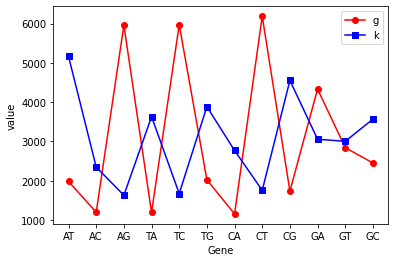

In [ ]:
from matplotlib import pyplot as plt

x_values = ['AT','AC','AG','TA','TC','TG','CA','CT','CG','GA','GT','GC']
y_values_1 = [len_gAT,len_gAC,len_gAG,len_gTA,len_gTC,len_gTG,len_gCA,len_gCT,len_gCG,len_gGA,len_gGT,len_gGC]
y_values_2 = [len_kAT,len_kAC,len_kAG,len_kTA,len_kTC,len_kTG,len_kCA,len_kCT,len_kCG,len_kGA,len_kGT,len_kGC]

plt.plot(x_values, y_values_1,label="g",color='red',marker='o')
plt.plot(x_values, y_values_2,label="k",color='blue',marker='s')

plt.xlabel('Gene')
plt.ylabel('value')


plt.legend(loc=1)

plt.show()

In [ ]:
rs1 = chr22[['%ID']]
rs3 = rs1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
rs2 = chr22[['rsName']]
rs4 = rs2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
rs3['%ID'].to_list()
lst1=list(rs3['%ID'])
rs4['rsName'].to_list()
lst2=list(rs4['rsName'])
lst3 = set(lst2)-set(lst1)

In [ ]:
rs_list = pd.DataFrame (lst3, columns = ['rs'])
rs_list.sort_values(ascending=False,by=['rs'])


,rs
3975,rs999266070
3553,rs998966405
3172,rs998861686
2527,rs997876584
893,rs997334008
...,...
1210,rs1001296022
1981,rs1000584319
2023,rs1000074137
176,rs1000029004


In [ ]:
rs = pd.concat([rs1,rs2],axis=1).reset_index(drop=True).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
rs

,%ID,rsName
0,rs374742143,rs374742143
1,rs375383604,rs375383604
2,rs199856444,rs199856444
3,rs149201999,rs149201999
4,rs2186463,rs2186463
...,...,...
191861,rs879956362,rs879956362
191862,rs2905159,rs2905159
191863,rs199560686,rs199560686
191864,rs200908937,rs200908937


In [ ]:
rs4['rsName'].isin(rs3['%ID']).value_counts()

True     187554
False      4033
Name: rsName, dtype: int64

In [ ]:
import pandas as pd

gprob = [0.03853,0.000009,0.00573,0.00001,0.000008,0.00000,0.00004]
kprob = [0.3402,0.0555,0.44,0.1057,0.0281,0.43,0.0185]

rsnumber = ['rs988728129(T)','rs1356837013(A)','rs1354007482(T)','rs1353457885(G)','rs1351316883(C)','rs1350458656(T)','rs1350140947(C)']
df = pd.DataFrame({'GP' : gprob, 'KP' : kprob}, index = rsnumber)
df

,GP,KP
rs988728129(T),0.038530,0.3402
rs1356837013(A),0.000009,0.0555
rs1354007482(T),0.005730,0.4400
rs1353457885(G),0.000010,0.1057
rs1351316883(C),0.000008,0.0281
rs1350458656(T),0.000000,0.4300
rs1350140947(C),0.000040,0.0185


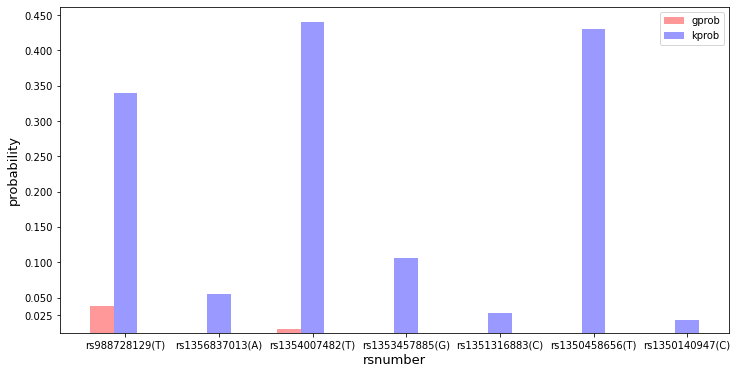

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(7)

b1 = plt.bar(index, df['GP'], bar_width, alpha=0.4, color='red', label='gprob')

b2 = plt.bar(index + bar_width, df['KP'], bar_width, alpha=0.4, color='blue', label='kprob')

plt.xticks(np.arange(bar_width, 7 + bar_width, 1), rsnumber)
plt.yticks([0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45])
plt.xlabel('rsnumber', size = 13)
plt.ylabel('probability', size = 13)
plt.legend()
plt.show()